In [1]:
%autosave 300
%matplotlib inline
import matplotlib.pyplot as plt
from hidden import *  # Функции, реалзация которых не особо интересна в свете этой темы
from visual_utils import *

Autosaving every 300 seconds


In [2]:
source = [(4,0),(5,2),(3,3),(0,7),(-3,5),(-4,3),(-6,2),(-3,-1)]
source = list(map(lambda i: Vertex(i[0],i[1]), source))
D = build_dcel(source)

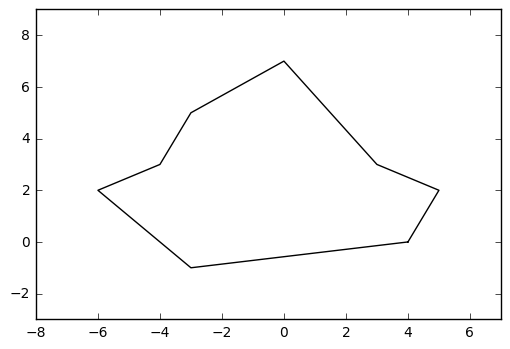

In [3]:
draw_points(source, types=False)

In [4]:
def different_chains(v1, v2):
    h1 = v1.hedgelist[1]
    h2 = v2.hedgelist[1]
    down1 = h1.origin < h1.twin.origin
    down2 = h2.origin < h2.twin.origin
    return down1 != down2

In [5]:
Q = list(sorted(source))
S = [] # Наш стек
D1 = [] # Добавленные диагонали
S.append(Q[0])
S.append(Q[1])
c = 0 # Просто счётчик порядка файлов визуализации
folder = 'triang' # Folder for step images
os.makedirs(folder, exist_ok=True)

from IPython.core.debugger import Tracer
for j in range(2, len(Q)):
    visual_dump_triang(Q[j],D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))
    c+=1
    if different_chains(Q[j],S[-1]):
        while len(S) > 0:
            if len(S) != 1:
                top = S.pop()
                D1.append(add_diagonal(Q[j].hedgelist[1],top.hedgelist[1]))
                visual_dump_triang(Q[j],D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))
                c+=1
            else:
                S.pop()
        S.append(Q[j-1])
        S.append(Q[j])
        visual_dump_triang(Q[j],D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))
        c+=1
    else:
        last = S.pop()
        while len(S) > 0 and turn(Q[j], last, S[-1]) > 0:
            last = S.pop()
            D1.append(add_diagonal(Q[j].hedgelist[1], last.hedgelist[1]))
            visual_dump_triang(Q[j],D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))
            c+=1
        S.append(last)
        S.append(Q[j])
S.pop()
while len(S) > 0:
    if len(S) != 1:
        top = S.pop()
        D1.append(add_diagonal(Q[j].hedgelist[1],top.hedgelist[1]))
        visual_dump_triang(Q[j],D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))
        c+=1
    else:
        S.pop()

visual_dump_triang(None, D,D1,S,Q,os.path.join(folder,'{}.png'.format(c)))

[ADD DIAGONAL] from: (3;3) to: (-4;3)
[ADD DIAGONAL] from: (3;3) to: (-3;5)
[ADD DIAGONAL] from: (-6;2) to: (3;3)
[ADD DIAGONAL] from: (5;2) to: (-6;2)
[ADD DIAGONAL] from: (4;0) to: (-6;2)
[ADD DIAGONAL] from: (-3;-1) to: (-6;2)


In [6]:
from IPython.display import display

display(SlideShower(folder))